# COM4509/6509 Assignment 2023

Hello, this is programming assignment for *Machine Learning and Adaptive Intelligence*. This is worth 50% of the module grade, the remaining 50% will be assessed via the formal exam.

**Deadline: 11th December 2023, 23:59**

Please submit well before the deadline as there may be delays in the submission. Submission will be via Blackboard, the link will be made available closer to the deadline.

There are 2 parts to this assignment, covering different portions of the course. Both parts are worth 50 marks to give a combined total of 100 marks. Both contain a set of questions which will ask you to implement various machine learning algorithms that are covered throughout the course. You will receive marks for the correctness of your implementations, text based responses to certain questions and the quality of your code. Each question indicates how many marks are available for completing that questions.

### Assignment help

If you are stuck and unsure what you need to do then please ask either in the lectures, labs or on the discussion board. There is a limit to what help we can provide but where possible we will give general guidance with how to proceed. We will also collect frequently asked questions [here](https://docs.google.com/document/d/1aOxtjm1J_A9uYpA7sjdJKodTh72ZHZdwr43B9YCpJGo/edit?usp=sharing).

We are happy for you to discuss the assignment with other students but your code and test answers **must** be your own

### What to submit

- You need to submit your **jupyter notebooks** and a **pdf** copy of it (not zipped together), named:

```
assignment_[username].ipynb
assignment_[username].pdf
```
replacing `[username]` with your username, e.g. `abc18de`.

- **Please execute the cells before your submission**. The **pdf** copy will be used as a backup in case the data gets corrupted and since we cannot run all the notebooks during marking. The best way to get a pdf is using Jupyter Notebook locally but if you are using Google Colab and are unable to download it to use Jupyter then you can use the Google Colab *file $\rightarrow$ print* to get a pdf copy.
- **Please do not upload** the data files used in this Notebook. We just want the python notebook *and the pdf*.


### Late submissions

We follow the department's guidelines about late submissions, Undergraduate [handbook link](https://sites.google.com/sheffield.ac.uk/comughandbook/your-study/assessment/late-submission). PGT [handbook link](https://sites.google.com/sheffield.ac.uk/compgtstudenthandbook/home/your-study/assessment/late-submission).

### Use of unfair means

This is an individual assignment, while you may discuss this with your classmates, **please make sure you submit your own code**. You are allowed to use code from the labs as a basis of your submission.

"Any form of unfair means is treated as a serious academic offence and action may be taken under the Discipline Regulations." (from the students Handbook).

### Reproducibility and readibility
Whenever there is randomness in the computation, you MUST set a random seed for reproducibility. Use your UCard number XXXXXXXXX (or the digits in your registration number if you do not have one) as the random seed throughout this assignment. You can set the seeds using torch.manual_seed(XXXXX) and np.random.seed(XXXXX).
Answers for each question should be clearly indicated in your notebook. While code segments are indicated for answers, you may use more cells as necessary.  All code should be clearly documented and explained.
Note: You will make several design choices (e.g. hyperparameters) in this assignment. There are no “standard answers”. You are encouraged to explore several design choices to settle down with good/best ones, if time permits.


Enter your username (used for marking):

In [1]:
username = 'ACS23AB'

# Part 1

## Overview
This part of the assignment will focus on lecture 4.

This is the *first* of the two parts. Each part accounts for 50\% of the overall coursework mark and this part has a total of 50 marks available.
Attempt as much of this as you can. The questions below account for 45 marks. Your submitted code will also be scored based on conciseness, quality, efficiency and commenting (5 marks).

### Assessment Criteria
The marks associated with each question are shown in square brackets. There are also 5 marks for code quality (including readability and efficiency).

You'll get marks for correct code that does what is asked and for text based answers to particular points. You should make sure any figures are plotted properly with axis labels and figure legends.




In [2]:
#We need to download a python file that contains some useful functions.

!wget michaeltsmith.org.uk/assignment.py

--2023-11-23 12:45:38--  http://michaeltsmith.org.uk/assignment.py
Resolving michaeltsmith.org.uk (michaeltsmith.org.uk)... 100.26.179.211
Connecting to michaeltsmith.org.uk (michaeltsmith.org.uk)|100.26.179.211|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17514 (17K) [text/x-python]
Saving to: 'assignment.py.5'

     0K .......... .......                                    100%  132K=0.1s

2023-11-23 12:45:39 (132 KB/s) - 'assignment.py.5' saved [17514/17514]



In [1]:
#and import some modules

import assignment
import numpy as np
import matplotlib.pyplot as plt

# The Problem

Ecologists have monitored the population of Haggis on a particular mountain for five years. They have precise recordings (see `xtrue` and `ytrue`) and estimates from satellite remote sensing (`xdata` and `ydata`). They want to be able to *forecast* the *true population*, 12 months into the future.

In [2]:
xdata,ydata,xtrue,ytrue = assignment.data()

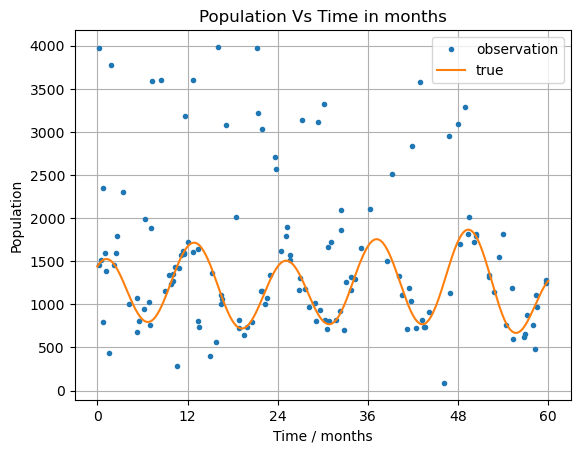

In [3]:
plt.plot(xdata,ydata,'.',label='observation')
plt.plot(xtrue,ytrue,'-',label='true')
plt.xticks(np.arange(0,61,12))
plt.xlabel('Time / months')
plt.ylabel('Population')
plt.title('Population Vs Time in months')
plt.legend()
plt.grid()

### Question 1 [3 marks]

When developing your model for this problem, how could you split your data into training, validation and testing? (and why?) [max 30 words]

In [6]:
q1 = "Enter your answer here"
assignment.wc(q1)

4 words


### Question 2: Gaussian Basis [9 marks]

In lab 4 you used a polynomial basis. The answer was of the form:

```
def polynomial(x, num_basis=4, data_limits=[-1., 1.]):
    Phi = np.zeros((x.shape[0], num_basis))
    for i in range(num_basis):
        Phi[:, i:i+1] = x**i
    return Phi
```    
    
For this question, write a new function that creates a **Gaussian basis**.

Each basis function is of the form, $\exp[-\frac{(x-c)^2}{2w^2}]$. Where `c` is the centre of each Gaussian basis, and $w$ is a constant (hyperparameter) that says how wide they are. You will want to space them uniformly across the domain specified by `data_limits`. So if `data_limits = [-2, 4]` and `num_basis = 4`. The centres will be at, -2 0 2 4.

Note: For now **we'll not have a constant term** (this will be ok if you standardise your data, as the mean will be zero).

In [4]:
def gaussian(x, num_basis=4, data_limits=[-1., 1.], width = 10):
    gaussian_means = np.linspace(data_limits[0],data_limits[1],num_basis)
    #To do: Implement
    Phi = np.zeros((x.shape[0], num_basis))
    for i in range(num_basis):
        Phi[:,i] = np.exp(-(x - gaussian_means[i])**2/(2*width**2))
    return Phi

assignment.checkQ2(gaussian)

Success


### Question 3: Ordinary Least Squares Regression [7 marks]

Rather than compute the closed form solution we will compute the gradient and use gradient descent for ridge regression (L2 regularisation).

First, write a function to compute the gradient of the sum squared error wrt a parameter vector w. Given it has L2 regularisation (with regularisation parameter $\lambda$).

To get you started, here is the $L2$ regularised cost function:

$$E = (y - \Phi w)^\top  (y - \Phi w) + \lambda w ^ \top w$$

In [5]:
def grad_ridge(Phi,y,w,lam):
    """
    Return an D dimensional vector of gradients of w, assuming we want to minimise the sum squared error
    using the design matrix in Phi; under ridge regression with regularisation parameter lambda.
    Arguments:
     - Phi, N x D design matrix
     - y, training outputs
     - w, parameters (we are finding the gradient at this value of w)
     - lam, the lambda regularisation parameter.
    """
    dedw = 2*(-Phi.T@y + Phi.T@Phi@w + lam*w)
    return dedw #To do: Implement

assignment.checkQ3(grad_ridge)

Success


This `grad_descent` function uses gradient descent to minimise the cost function (optimise using an appropriate learning rate).

In [6]:
def grad_descent(grad_fn,Phi,y,lam):
    """
    Compute optimised w.
    Parameters:
       - grad, the gradient function
       - Phi, design matrix (shape N x D)
       - y, vector of observations (length N)
       - lam, regularisation parameter, lambda.
    Returns
       - w_optimsed, a vector (length D) that minimises the ridge regression cost function
    """
    w = np.zeros(Phi.shape[1])
    for it in range(10000):
        g = grad_fn(Phi,y,w,lam)
        w-=0.0001*g
    return w

### Let's see how we're doing...

In this code I standardise the training data labels, and use the methods you have written to make predictions for all the `true` data. Note that I'm holding out the last 12 months to see how the model looks for forecasting. I've also not used any validation, but instead have just used fixed value of the hyperparameters.

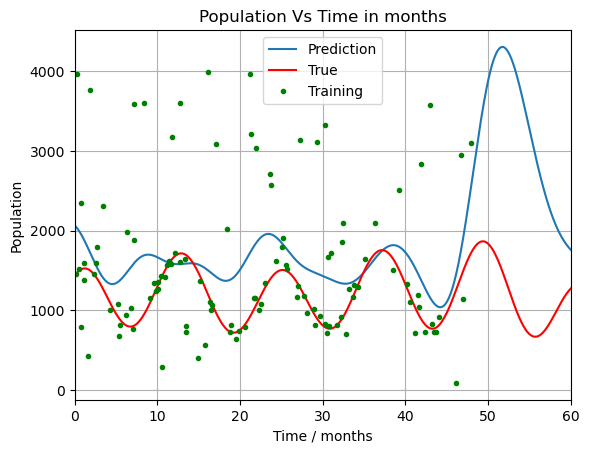

In [7]:
xtrain = xdata[xdata<48]
ytrain = ydata[xdata<48]
xval = xtrue[xtrue>=48]
yval = ytrue[xtrue>=48]

data_mean = np.mean(ytrain)
data_std = np.std(ytrain)
ytrain_standardised = (ytrain - data_mean)/data_std

Phi = gaussian(xtrain,120,[0,60],3)
w = grad_descent(grad_ridge,Phi,ytrain_standardised,0.01)
truePhi = gaussian(xtrue,120,[0,60],3)
plt.plot(xtrue,(truePhi @ w)*data_std+data_mean,label='Prediction')
plt.plot(xtrue,ytrue,'-r',label='True')
plt.plot(xtrain,ytrain,'.g',label='Training')
plt.xlabel('Time / months')
plt.ylabel('Population')
plt.title('Population Vs Time in months')
plt.legend()
plt.grid()
plt.xlim([0,60])
s = 0
for i in range(len(truePhi)):
    k = (truePhi[i] @ w)*data_std+data_mean
    s += (ytrue[i] - k)*(ytrue[i] - k)
sum_sqerror = s

There are two more tasks to do:

1) handle the outliers
2) Use a better basis

### Question 4 [5 marks]

Let's use the sum of absolute errors, rather than the sum squared error, as the cost function. We will also keep the L2 regulariser. So the cost function can be:

$$E = \sum_{i=1}^N{ \Big| [\Phi]_{i} w - y_i \Big|} + \lambda w^\top w$$

Write down a function that computes the gradient of this function wrt w.

In [8]:
def grad_abs(Phi,y,w,lam):
    """
    Return an D dimensional vector of gradients of w, assuming we want to minimise the sum absolute error
    using the design matrix in Phi; under L2 regularisation parameter lambda.
    Arguments:
     - Phi, N x D design matrix
     - y, training outputs
     - w, parameters (we are finding the gradient at this value of w)
     - lam, the lambda regularisation parameter.
    """
    gradient1 = np.zeros_like(w)
    Phi1 = np.zeros_like(Phi)
    for i in range(len(Phi)):
        c = Phi[i]@w - y[i]
        Phi1[i] = np.sign(c)*Phi[i]
        gradient1 += Phi1[i]
    
    dedw = gradient1 + 2*lam*w
    return dedw #To do: Implement

assignment.checkQ4(grad_abs)

Success


Let's see what the result looks like, using the absolute error:

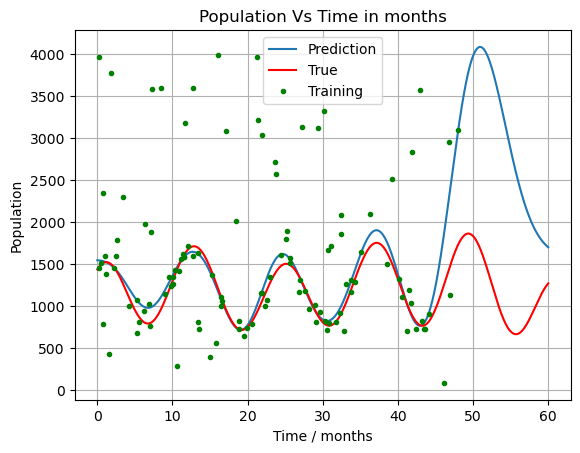

In [9]:
Phi = gaussian(xtrain,120,[0,60],3)
w = grad_descent(grad_abs,Phi,ytrain_standardised,0.01)
truePhi = gaussian(xtrue,120,[0,60],3)
plt.plot(xtrue,(truePhi @ w)*data_std+data_mean,label='Prediction')
plt.plot(xtrue,ytrue,'-r',label='True')
plt.plot(xtrain,ytrain,'.g',label='Training')
plt.xlabel('Time / months')
plt.ylabel('Population')
plt.title('Population Vs Time in months')
plt.legend()
plt.grid()
s = 0
for i in range(len(truePhi)):
    s += np.abs((truePhi[i] @ w)*data_std+data_mean - ytrue[i])
sum_aerr = s

### Question 5 [3 marks]

Comment on this result in terms why this result appears better than the sum-squared cost function [max 30 words]

In [13]:
print('Sum of squared error:',sum_sqerror)
print('Sum of absolute error:',sum_aerr)

Sum of squared error: 1072873729.5909171
Sum of absolute error: 459582.55272097985


In [14]:
q5 = "Enter your answer here"
assignment.wc(q5)

4 words


### Question 6 [7 marks]

To improve its ability to forecast we observe that there seems to be an annual oscillation in the data. Can you create a basis that combines both Gaussian bases *AND* sinusoidal bases *of the appropriate wavelength*. Please use half of the `num_basis` for the Gaussian bases, and the other half for the sinusoidal ones. All the sinusoidal bases should have a 12 month period, but with a range of offsets (uniformly distributed between 0 and 6, but not including 6).

In [10]:
def gaussian_and_sinusoidal(x, num_basis=4, data_limits=[-1., 1.], width = 10):
    """
    Return an N x D design matrix.
    Arguments:
     - x, input values (N dimensional vector)
     - num_basis, number of basis functions (specifies D)
     - data_limits, a list of two numbers, specifying the minimum and maximum of the data input domain.
     - width, the 'spread' of the Gaussians in the basis

    Half the bases are Gaussian, half are evenly spaced cosines of 12 month period (offset by between 0 to 6 months)
    """
    #To do: Implement
    Phi = np.zeros((x.shape[0], num_basis))
    #Gaussian Basis Function
    Phi[:,0:num_basis//2] = gaussian(x, num_basis//2, data_limits, width)
    offset = np.linspace(0,6,num_basis//2,endpoint=False)

    #sinusoidal basis function
    for i in range(num_basis//2):
        Phi[:,i+num_basis//2] = np.sin(2*np.pi*(x-offset[i])/12)
    return Phi

Let's see how this has affected the result:

305107.9872778444


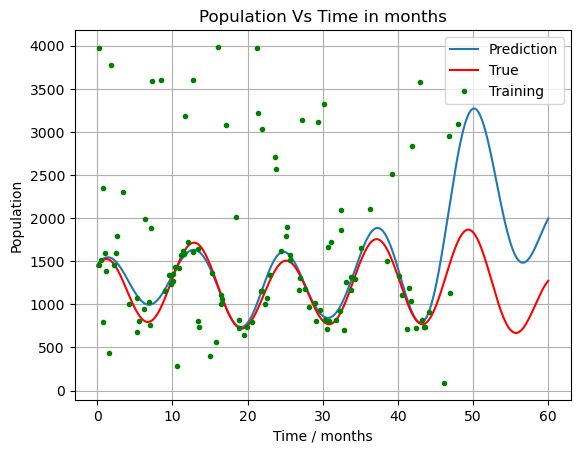

In [11]:

Phi = gaussian_and_sinusoidal(xtrain,120,[0,60],3)
w = grad_descent(grad_abs,Phi,ytrain_standardised,0.01)
truePhi = gaussian_and_sinusoidal(xtrue,120,[0,60],3)
plt.plot(xtrue,(truePhi @ w)*data_std+data_mean,label='Prediction')
plt.plot(xtrue,ytrue,'-r',label='True')
plt.plot(xtrain,ytrain,'.g',label='Training')
plt.xlabel('Time / months')
plt.ylabel('Population')
plt.title('Population Vs Time in months')
plt.legend()
plt.grid()
s = 0
for i in range(len(truePhi)):
    s += np.abs((truePhi[i]@w)*data_std+data_mean - ytrue[i] )
sae = s #sum of absolute error
print(sae)

### Question 7 [11 marks]

We now need to select the parameters.

Write some code that:
- Selects good parameters
- Draws a graph of the result

For this question you will need to:
- Decide on how you will select:
    - an appropriate number of bases
    - an appropriate Gaussian basis width
    - an appropriate regularisation term
- (you might want to use a validation set)
- Decide how you will split your data into training and validation. You could use the approach we used at the end of Q3. Remember: You are given the true underlying function, in `xtrue` and `ytrue`, so it is a comparison with that which matters. Remember also that you want to do well at **forecasting**!
- Plot a graph showing (a) the training points used; (b) the true population (`truex`, `truey`); and (c) your predictions.

Initialized Validation Error: 122113.96806437592
Updated Validation Error: 87986.16616062485
Updated Validation Error: 52186.51233403952
Updated Validation Error: 50323.05433965357
Updated Validation Error: 45197.73734949483
Updated Validation Error: 44823.76644863585

The Best parameters obtained after validation:
 {'val_error': 44823.76644863585, 'num_basis': 300, 'lambda': 0.01, 'width': 10}

The Sum of absolute error for True data: 98474.09473234025


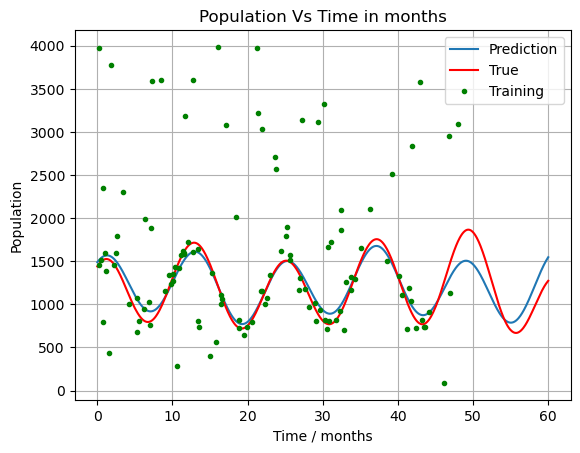

In [12]:
#code here
#Train-Validation dataset split
xtrain = xdata[xdata<48]
ytrain = ydata[xdata<48]
xval = xtrue[xtrue>=48]
yval = ytrue[xtrue>=48]
x1 = xtrue[xtrue<48]
y1 = ytrue[xtrue<48]

data_mean = np.mean(ytrain)
data_std = np.std(ytrain)
ytrain_standardised = (ytrain - data_mean)/data_std

#Validation Data Hyper-parameter tuning
num = [50,100,200,300]
lamd = [0.005,0.01,0.05,0.1]
wid = [2.5,3,5.5,10]
Phi = gaussian_and_sinusoidal(xtrain,num[0],[0,60],wid[0])
w = grad_descent(grad_abs,Phi,ytrain_standardised,lamd[0])
valPhi = gaussian_and_sinusoidal(xval,num[0],[0,60],wid[0])
best_params = {}
s = 0
for i in range(len(valPhi)):
    s += np.abs((valPhi[i]@w)*data_std+data_mean - yval[i] )
e1 = s #sum of absolute error
print('Initialized Validation Error:',e1)
best_params['val_error'] = e1
best_params['num_basis'] = num[0]
best_params['lambda'] = lamd[0]
best_params['width'] = wid[0]
for i in num:
    for j in lamd:
        for k in wid:
            Phi = gaussian_and_sinusoidal(xtrain,i,[0,60],k)
            w = grad_descent(grad_abs,Phi,ytrain_standardised,j)
            valPhi = gaussian_and_sinusoidal(xval,i,[0,60],k)
            s = 0
            for l in range(len(valPhi)):
                s += np.abs((valPhi[l]@w)*data_std+data_mean - yval[l] )
            e = s #sum of absolute error
            if e < e1 :
                best_params['val_error'] = e
                best_params['num_basis'] = i
                best_params['lambda'] = j
                best_params['width'] = k
                e1 = e
                print('Updated Validation Error:',e)

print('\nThe Best parameters obtained after validation:\n',best_params)
num_basis = best_params['num_basis']
lam = best_params['lambda']
width = best_params['width']

#Testing on True data and forecasting for the last 12 months
Phi = gaussian_and_sinusoidal(xtrain,num_basis,[0,60],width)
w = grad_descent(grad_abs,Phi,ytrain_standardised,lam)
truePhi = gaussian_and_sinusoidal(xtrue,num_basis,[0,60],width)
plt.plot(xtrue,(truePhi @ w)*data_std+data_mean,label='Prediction')
plt.plot(xtrue,ytrue,'-r',label='True')
plt.plot(xtrain,ytrain,'.g',label='Training')
plt.xlabel('Time / months')
plt.ylabel('Population')
plt.title('Population Vs Time in months')
plt.legend()
plt.grid()
s = 0
for i in range(len(truePhi)):
    s += np.abs((truePhi[i]@w)*data_std+data_mean - ytrue[i] )
sae = s #sum of absolute error
print('\nThe Sum of absolute error for True data:',sae)

<hr>

# Part 2

This is the *second* of the two parts. Each part accounts for 50\% of the overall coursework mark and this part has a total of 50 marks available.
Attempt as much of this as you can, each of the questions are self-contained and contain some easier and harder bits so even if you can't complete Q1 straight away then you may still be able to progress with the other questions.

## Overview
This part of the assignment will cover:
- Q1: Dimensionality reduction and clustering (lectures 8 and 9)
- Q2: Classification and neural networks (lectures 6, 7 and 8)


### Assessment Criteria

- The marks for this part are distributed as follows:
    - **Q1**: 20 marks
    - **Q2**: 25 marks
    - **Code quality** (including readability and efficiency): 5 marks
- You'll get marks for correct code that does what is asked and for text based answers to particular points. We are not overly concerned with model performance but you should still aim to get the best results you can for your chosen approaches. You should make sure any figures are plotted properly with axis labels and figure legends.

If you are unsure about how to proceed then please ask. We will compile a list of



## Question 1: Clustering and dimensionality reduction [20 marks]

For this question you are asked apply a **clustering algorithm** of your choice (e.g K-means or spectral clustering) to a dataset with a large number of features, then apply a **dimensionality reduction** method (e.g PCA, Auto-encoder) to plot the clusters in a reduced feature space.

The dataset that you will be using is the UCI Human Activity Recognition dataset ([link](https://doi.org/10.24432/C54S4K)) which contains measurements using smartphone sensors during certain activities. The data has been pre-processed to give **561** features, representing many different aspects of the sensor dynamics. While this is a timeseries we will only consider individual samples, of which there are **7352** in the training set. This has been provided on Blackboard and can be downloaded as a compressed .npz file.

### What you need to do

This question is split into 4 sub-parts, each will be marked based not only on the correctness of your code solution but a short text response to either justify the algorithms used or a discussion of the results of your code.
The 4 parts to this questions are:
1) Choosing and applying a clustering algorithm to the data and justifying your approach.
2) Analysing the quality of the clustering solution and discussing the results.
3) Choosing and applying a dimensionality reduction technique and justifying your approach.
4) Plotting the clusters in the reduced feature space and discussing the plots.




In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
dataset = np.load('./UCI_HAR.npz')

x_train = dataset['x_train']
y_train = dataset['y_train']

print(f'The training set contains {x_train.shape[0]} samples, each with {x_train.shape[1]} features.')
print(f'There are {len(np.unique(y_train))} classes.')

The training set contains 7352 samples, each with 561 features.
There are 6 classes.


### 1.1 Clustering of the data [5 marks]

Choose a clustering algorithm (either one from class or an appropriate one from elsewhere) and apply it to this dataset. You will need to perform some analysis to select any necessary hyper-parameters.

In [46]:
# Program your clustering solution here. You may use multiple cell blocks as appropriate.
from sklearn.cluster import k_means
k = [2,4,6,8]
inmethod = ['random','k-means++']
ninit = [10,15,20,30]
best_kmeans = {}
km_centroids, km_clusters, inertia = k_means(x_train, n_clusters=k[0],n_init=ninit[0],init=inmethod[0])
best_kmeans['K'] = k[0]
score1 = inertia
best_kmeans['inertia'] = score1
best_kmeans['init'] = inmethod[0]
best_kmeans['n_init'] = ninit[0]
print(best_kmeans)
for i in k:
    for j in inmethod:
        for k in ninit:
            km_centroids, km_clusters, inertia = k_means(x_train, n_clusters=i,n_init=k,init=j)
            score = inertia
            if score<score1:
                score1 = score
                best_kmeans['K'] = i
                best_kmeans['inertia'] = score1
                best_kmeans['init'] = j
                best_kmeans['n_init'] = k
                print(best_kmeans)

#print(best_kmeans)


{'K': 2, 'inertia': 175201.89185921196, 'init': 'random', 'n_init': 10}
{'K': 4, 'inertia': 143709.96528470083, 'init': 'random', 'n_init': 10}
{'K': 4, 'inertia': 143709.85539352742, 'init': 'k-means++', 'n_init': 15}
{'K': 6, 'inertia': 131492.2118165546, 'init': 'random', 'n_init': 10}
{'K': 6, 'inertia': 131491.59954501814, 'init': 'random', 'n_init': 20}
{'K': 6, 'inertia': 131491.31205515246, 'init': 'k-means++', 'n_init': 10}
{'K': 6, 'inertia': 131491.30016210338, 'init': 'k-means++', 'n_init': 30}
{'K': 8, 'inertia': 124138.7587137399, 'init': 'random', 'n_init': 10}
{'K': 8, 'inertia': 124127.6158586108, 'init': 'random', 'n_init': 15}
{'K': 8, 'inertia': 124118.91277939468, 'init': 'random', 'n_init': 20}
{'K': 8, 'inertia': 124118.72430647865, 'init': 'random', 'n_init': 30}
{'K': 8, 'inertia': 124118.70871702854, 'init': 'k-means++', 'n_init': 30}


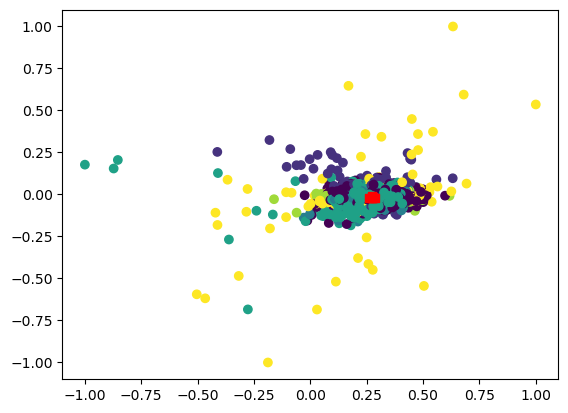

In [47]:
km_centroids, km_clusters, inertia = k_means(x_train, n_clusters=best_kmeans['K'],n_init= best_kmeans['n_init'],init=best_kmeans['init'])
plt.scatter(x_train[:, 0], x_train[:, 1], c=km_clusters)
plt.scatter(km_centroids[:, 0], km_centroids[:, 1], s = 30, marker='s',c='red')

In the following markdown block, provide a justification of the algorithm that you selected and of any hyper-parameters that you have selected.

*Write your answer here.*

### 1.2 Analysis of the clustering quality [5 marks]

Using an appropriate analysis metric (e.g, cluster purity, the labels are available to use in the `y_train` array), measure the quality of the clustering.

In [ ]:
# Program your cluster quality metric here

Write a short discussion of these results commenting on the clustering performance, the relevance of your chosen analysis metric and any conclusions you have about the clustering of the data.



*Write your discussion here*

### 1.3 Training a dimensionality reduction method [5 marks]

Now you will need to choose a dimensionality reduction method that is able to reduce the number of features down to **3**. Again, where necessary you will need to select appropriate hyper-parameters.

In [ ]:
# Program your dimensionality reduction here.

In the following markdown block, provide a justification for the dimensionality reduction technique that you have used and (if any) how you selected your hyper-parameters. Be clear as to the advantages and disadvantages to your approach.

*Write your discussion here*

### 1.4 Plotting the clusters in the reduced feature space [5 marks]

Now that you have transformed your data into 3 dimensions, create a set of plots to show the clusters in these reduced dimensions. Make separate plots using the clustering labels from part 1.1 and also the ground truth labels to show how well it has been clustered. Where possible combine the figures in sensible ways using subplots.

Plot these as a set of 2d plots of the combinations of all the reduced dimensions. You may additionally plot this as a 3d plot, if this helps with the visualisation.

In [ ]:
# Program your plots here

Write a short comment on your plots, evaluating the performance of the dimensionality reduction and how well the clustering has done in this visualisation. Are there any key conclusion spanning the whole question that you can draw?

*Write your discussion here*

## Question 2: Classification and neural networks [25 marks]

This second questions will look at implementing classifier models via supervised learning to correctly classify images. We will be using images from the MedMNIST dataset which contains a range of health related image datasets that have been designed to match the shape of the original digits MNIST dataset. Specifically we will be working with the BloodMNIST part of the dataset. The code below will download the dataset for you and load the numpy data file. The data file will be loaded as a dictionary that contains both the images and labels already split to into training, validation and test sets. The each sample is a 28 by 28 RGB image and are not normalised. You will need to consider any necessary pre-processing.

Your task in this questions is to train **at least 4** different classifier architectures (e.g logistic regression, fully-connected network etc) on this dataset and compare their performance. These can be any of the classifier models introduced in class or any reasonable model from elsewhere. You should consider 4 architectures that are a of suitable variety i.e simply changing the activation function would score lower marks than trying different layer combinations.

This question will be broken into the following parts:
1. A text description of the model architectures that you have selected and a justification of why you have chosen them. Marks will be awarded for suitability, variety and quality of the architectures.
2. The training of the models and the optimisation of any hyper-parameters.
3. A plot comparing the accuracy and error (or loss), on separate graphs, of the different architectures and a short discussion of the results.

In [ ]:
import numpy as np
import urllib.request
import os

# Download the dataset to the local folder
if not os.path.isfile('./bloodmnist.npz'):
    urllib.request.urlretrieve('https://zenodo.org/record/6496656/files/bloodmnist.npz?download=1', 'bloodmnist.npz')

# Load the compressed numpy array file
dataset = np.load('./bloodmnist.npz')

# The loaded dataset contains each array internally
for key in dataset.keys():
    print(key, dataset[key].shape, dataset[key].dtype)

In [ ]:
print(dataset['train_images'].shape)

### 2.1 What models/architectures have you chosen to implement [5 marks]

In the following block, write a short (max 200 words) description and justification of the architectures that you have chosen to implement. You should also think about any optimisers and error or loss functions that you will be using and why they might be suitable.

*Write your answer here.*

### 2.2 Implementation and training of your models. [10 marks]

You should now implement the models that you have introduced above, train them and optimise any hyper-parameters using the validation set. You may wish to store any training results for the next sub-question.

In [ ]:
# Program your models here. You can use as many cells as necessary but aim to be concise.

In the following block, comment on the success of the training process and provide a description of how you have selected or optimised any hyper-parameters.

*Write your answer here.*

### 2.3 Classification results based on the test data [10 marks]

You should now plot the accuracy and error (or loss), on separate graphs, for the training and testing set. You may also undertake any other performance analysis of your models.

In [ ]:
# Program your plots here.

Now provide a short discussion evaluating your results and the architectures that you have used. Provide any conclusions that you can make from the data:

*Write your answer here.*